# Fourier smoothing

Notebook for AMath 570, Autumn Quarter 2015, R.J. LeVeque

See: http://faculty.washington.edu/rjl/classes/am570a2015/codes.html

### Aliasing in the DFT

For a periodic function $u(x)$ we can write
$$
u(x) = \frac{1}{2\pi}\sum_{k=-\infty}^\infty e^{ikx} \hat u_k, \quad\quad 
\text{where}\quad \hat u_k = \int_0^{2\pi} e^{-ikx}u(x)\,dx.
$$
The Discrete Fourier Transform can be viewed as an approximation to this using $N$ points $x_j=jh$ with $h=2\pi/N$,
$$
v_j = u(x_j) = \frac{1}{2\pi} \sum_{k=-N/2+1}^{N/2} e^{ikx_j}\, \hat v_k, \quad\quad
\text{where}\quad \hat v_k = \frac 1 N \sum_{j=1}^N e^{-ikx_j}\,v_j.
$$

Similar to Theorem 2 in SMM Chapter 4, there is an aliasing theorem that relates these:

**Theorem:** 
$\quad\displaystyle \hat v_k = \sum_{\ell=-\infty}^\infty \hat u_{k + \ell N}.$

**Proof:** 

$$
\begin{align}
v_j = u(x_j) &= \frac{1}{2\pi}\sum_{k=-\infty}^\infty e^{ikx} \hat u_k \\
&= \frac{1}{2\pi} \left( \sum_{k=-N/2+1}^{N/2} e^{ikx_j}\, \hat u_k + \sum_{k=N/2+1}^{3N/2} e^{ikx_j}\, \hat u_k + \cdots \right) \\
\end{align}
$$
Now note that 
$$
\sum_{k=N/2+1}^{3N/2} e^{ikx_j}\, \hat u_k = \sum_{k=-N/2+1}^{N/2} e^{i(k+N)x_j}\, \hat u_{k+N}
= \sum_{k=-N/2+1}^{N/2} e^{ikx_j}\, \hat u_{k+N}
$$
since $e^{ikNx_j} = 1$ for all $j$.  Similarly for all other terms in the sum above, and so
$$
v_j = \frac{1}{2\pi} \sum_{k=-N/2+1}^{N/2} e^{ikx_j}\,\left( \sum_{\ell=-\infty}^\infty \hat u_{k + \ell N} \right)
$$

We thus see how the Fourier series that *interpolates* at $N$ points is related to the full Fourier series.

### Trucation / projection

Another approach to getting a finite Fourier series would be to take the full series and *truncate* it to $M$ terms, defining
$$
u_M(x) = \frac{1}{2\pi} \sum_{k=-M/2+1}^{M/2} e^{ikx}\, \hat u_k, \quad\quad 
\text{where}\quad \hat u_k = \int_0^{2\pi} e^{-ikx}u(x)\,dx.
$$
How does this relate to $v(x)$?  If we take $M=N$, then the function $u_N(v)$ has the same number of terms as $v(x)$, but different coefficients.  It no longer *interpolates* at equally spaced points.  Instead it gives the *best approximation* in the 2-norm (i.e. the *least squares* approximation.

If we let $F_M$ be the space of all Fourier sums with $M$ terms, then $u_M$ solves the problem
$$
\min_{p\in F_M} \|p - u\|_2, \quad\quad \text{where} \quad
\|w\|_2 = \left(\int_0^{2\pi} |w(x)|^2\, dx \right)^{1/2}.
$$
Recall that for complex valued functions, $|w(x)|^2 = w(x)\bar w(x)$ and also that the inner product of two functions can be defined by
$$ 
\langle w_1, w_2\rangle = \int_0^{2\pi} w_1(x) \bar w_2(x)\, dx 
$$
We say two functions are *orthogonal* if their inner product is 0.  Note that $e^{ik_1x}$ and $e^{ik_2 x}$ are orthogonal for any two integers $k_1 \neq k_2$, since their inner product is
$$
\int_0^{2\pi} e^{ik_1x}e^{-ik_2x}\, dx = \int_0^{2\pi} e^{i(k_1-k_2)x}\,dx
$$
If $k_1 = k_2$ then the integral is $2\pi$, otherwise it is 0.

In general the solution to a least squares problem has the property that the residual $p(x) - u(x)$ must be orthogonal to the space $F_M$.  This can be seen by noting that the square of the error is $\langle p-u, p-u\rangle$, writing $p$ as a Fourier sum in terms of unknown coefficients $\hat p_k$, differentiating with respect to each $\hat p_k$ and setting these derivatives to zero.  You should find the requirement that $\langle p-u, e^{ikx}\rangle = 0$ for each wave number occuring in the sum.  Now writing out $p$ and $u$ as Fourier sums in this expression and using the orthogonality of the Fourier modes, this condition reduces to $\hat p_k = \hat u_k$ for the wave numbers in the finite sum $p$.

### Approximating $u_M$ by a finite sum

Truncating the full Fourier series requires being able to compute the integrals that define the $\hat u_k$.  If this can't be done, we could use a finite sum.  If we use $M$ function values then we are back to the discrete Fourier transform $v(x)$ defined above, which we might call $v_M(x)$.  But another approach is to compute $v_N(x)$ for some $N > M$ and then truncate this to $M$ terms.  If the original function is smooth enough that the coefficents decay quickly then $v_N$ will be very close to $u$.  This is often done as a way of smoothing noisy data.


## Exploration:

Below we start with a Gaussian function and add some high frequencies as a way of generating a function to experiment with.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The next line makes it possible to zoom in on plots, only works with matplotlib 1.4 or later. 

In [2]:
# %matplotlib notebook   # uncomment to try this

In [3]:
xfine = linspace(0, 2*pi, 10000)

wave numbers: [16]
amplitudes: [0.1]


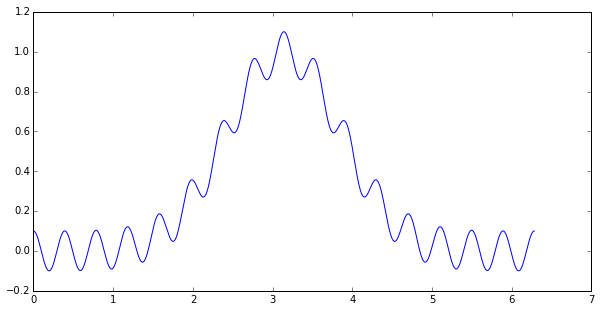

In [4]:
omega = [16]   # list of high frequencies to add (integers so noise is periodic)
m = len(omega)
a = m*[0.1]   # amplitudes

def u(x):
    u = exp(-(x-pi)**2)     # Gaussian
    for k in range(m):
        u = u + a[k] * cos(omega[k]*x)
    return u

figure(figsize=(10,5))
plot(xfine,u(xfine))
print 'wave numbers:', omega
print 'amplitudes:', a

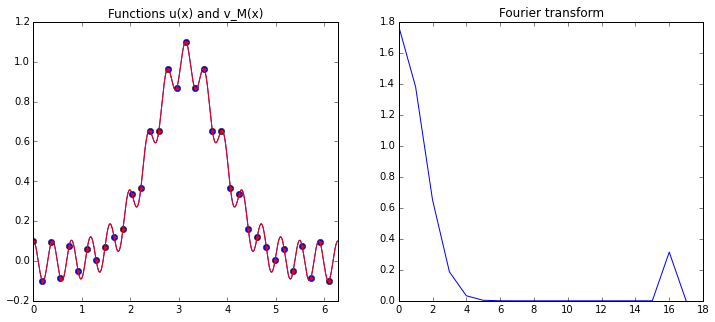

In [5]:
from scipy import fft,ifft
N = 34;
h = 2*pi/N
xj = linspace(0, 2*pi-h, N)  # note: fft assumes points are 0, h, 2h, ..., (N-1)h   (not h, 2h, ..., Nh)

M = N  # M = N ==> interpolation,  M < N gives smoothing  N and M shold be even

ik = 1j*hstack((range(0,N/2+1), range(-N/2+1,0)));   # i * wave number vector (matlab ordering)

vj = u(xj)
vj_hat = fft(vj) * h

def v(x):
    v = vj_hat[0] # constant term
    v += vj_hat[N/2] * cos(x*N/2) # N/2 term needs special handling: see SMM (3.4) 
    
    for k in range(1, M/2):
        v += exp(1j*k*x)*vj_hat[k] + exp(-1j*k*x)*vj_hat[N-k]
        
        # alternatively, for real vj can instead write this as:
        # v += 2*real(vj_hat[k])*cos(k*x) - 2*imag(vj_hat[k])*sin(k*x)
        
    v = v / (2.*pi)
    v = real(v)  # should be real already up to rounding errors!
    return v

figure(figsize=(12,5))
subplot(1,2,1)
plot(xfine,u(xfine),'b')
plot(xj, u(xj), 'bo')
plot(xj, v(xj), 'r.')
plot(xfine,v(xfine),'r')
xlim(0, 2*pi)
title('Functions u(x) and v_M(x)')

subplot(1,2,2)
plot(abs(vj_hat[:N/2+1]))
title('Fourier transform')


## Things to try:

Try changing the cells above and re-executing.  Try to explain what you see in each case.

 - `omega = [16]` and $N = 34$ or $N = 30$ with $M=N$.  Note that in the latter case wave number 16 is aliased to 14.
 - `omega = [16]` and $N = 10$.  Now what aliasing do you see?
 - `omega = [16]` and $N = 34$ and $M = 10$.  Now there is no aliasing of wave number 16 and the smoothed function $v_M(x)$ is very close to the Gaussian.
 - `omega = [16, 25]` and $N = 64$ and $M = 12$.
 - `omega = [16, 25]` and $N = 30$ and $M = 12$.
 - `omega = [16, 25]` and $N = 30$ and $M = 30$.
 - `omega = [16, 25]` and $N = 12$ and $M = 12$.
 
 